<a href="https://colab.research.google.com/github/Harsh62004/Summer_School_2022/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
#@title
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Logistic Regression

###-   Introduction to Classification
###-   Linear vs Logistic Regression
###-   Activation Function
###-   Logistic Loss Function
###-   Computing Gradients
###-   Non Linear Decision Boundray
###-   Multi-Class Classification



# Introduction
Logistic regression is another technique borrowed by machine learning from the field of statistics.

Classification techniques are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem.

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.


### Linear Regression Vs. Logistic Regression
Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. 

![comparision](https://www.researchgate.net/publication/335786324/figure/fig1/AS:802479209971712@1568337361258/Logistic-regression-and-linear-regression_W640.jpg)

\begin{align}
&\text{Linear Regression}\\~\\
&~~~~~~~~\mathbf{X}~~~~~~~~~~~~~~~~~~~~~~\mathbf{Y}\\
&\begin{bmatrix}
1 & 1.02\\ 
1 & -2.14\\ 
\vdots & \vdots\\ 
1 & 4.46\\ 
\end{bmatrix} →
\begin{bmatrix}
1.6\\ 
-3.6\\ 
\vdots\\ 
5.12\\ 
\end{bmatrix}\\~\\~\\
&\text{Logistic Regression}\\~\\
&~~~~~~~~~~~~~~~~~\mathbf{X}~~~~~~~~~~~~~~~~~~~~~~~~~\mathbf{Y}\\
&\begin{bmatrix}
1 & 1.02 & 0.43\\ 
1 & -2.14 & 3.34\\ 
\vdots & \vdots & \vdots\\ 
1 & 4.46 & -2.03\\ 
\end{bmatrix} →
\begin{bmatrix}
1\\ 
0\\ 
\vdots\\ 
1\\ 
\end{bmatrix}
\end{align}


### Logistic Regression
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. Logistic Regression predicts the probability of sample belonging to a class.

# Linear Regression Equation:

\begin{align}
h(x) &= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + \dots\\
h(x) &= \sum_{i}^{} w_i x_i\\
\mathbf{w}_{m \times 1} &=
\begin{bmatrix}
w_0\\ 
w_1\\ 
\dots\\ 
w_m\\ 
\end{bmatrix}\\
\mathbf{x}_{n \times m} &=
\begin{bmatrix}
x_{00} & x_{01} & \dots & x_{0m}\\ 
x_{10} & x_{11} & \dots & x_{1m}\\ 
\vdots & \vdots & \ddots & \vdots\\ 
x_{n0} & x_{n1} & \dots & x_{nm}\\ 
\end{bmatrix}\\
\mathbf{h(x)}_{n \times 1} &= \mathbf{x}\mathbf{w}
\end{align}

We Want to somehow trasform the scalar values into binary values.
\begin{align}
\begin{bmatrix}
1.6\\ 
-3.6\\ 
\vdots\\ 
5.12\\ 
\end{bmatrix}→
\begin{bmatrix}
1\\ 
0\\ 
\vdots\\ 
1\\ 
\end{bmatrix}
\end{align}



# Logistic Regression Equation:

In case of logistic regression we want our output to be a probability value, meaning $y \in [0, 1]$. To ensure that will use a special function $σ$ called an activation function. So, our logistic regression equation becomes:

\begin{align}
h(x) &= \sigma(w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + \dots) \\
h(x) &= \sigma(\sum_{i}^{} w_i x_i) \\
h(x) &= \sigma(\mathbf{x}\mathbf{w}) \\
\end{align}

### Activation Function
Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.

Here we are using the **Sigmoid** activation function. The sigmoid activation function is defined as 

$$ \sigma(z)=\frac{1}{1+e^{-z}} $$

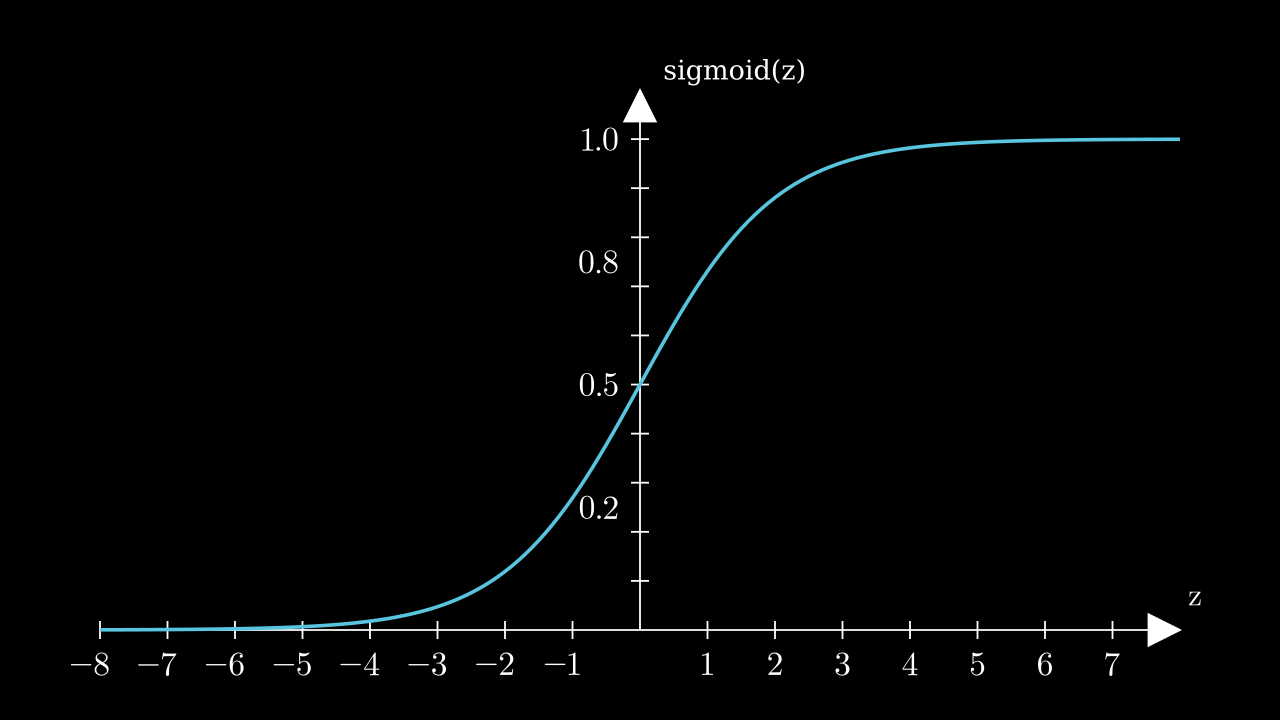

\begin{align}
h(x) &= \text{sigmoid}(w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + \dots) \\~\\
h(x) &= \text{sigmoid}(\sum_{i}^{} w_i x_i) \\~\\
\hat{y} =h(x) &= \text{sigmoid}(\mathbf{x}\mathbf{w}) \\
\end{align}

\begin{align}
&~~~\text{logit}~~~→~~\text{prob}~→~\text{label}\\~\\
&\begin{bmatrix}
1.6\\ 
-3.6\\ 
\vdots\\ 
5.12\\ 
\end{bmatrix}→
\begin{bmatrix}
0.7\\ 
0.07\\ 
\vdots\\ 
0.99\\ 
\end{bmatrix}→
\begin{bmatrix}
1\\ 
0\\ 
\vdots\\ 
1\\ 
\end{bmatrix}
\end{align}

# Loss Function

Why not use the Mean Squared Error as a loss function?

\begin{align}
\\
\text{MSE} &= (y - \hat{y})^2\\
\text{MSE} &= (y - \text{sigmoid}(z))^2\\~\\
\text{Where } z =& \mathbf{xw} \text{ and } y \in (0, 1)
\end{align}


So, for $y = 1$ our loss function becomes:

$$ MSE = (1 - \text{sigmoid(z)})^2$$

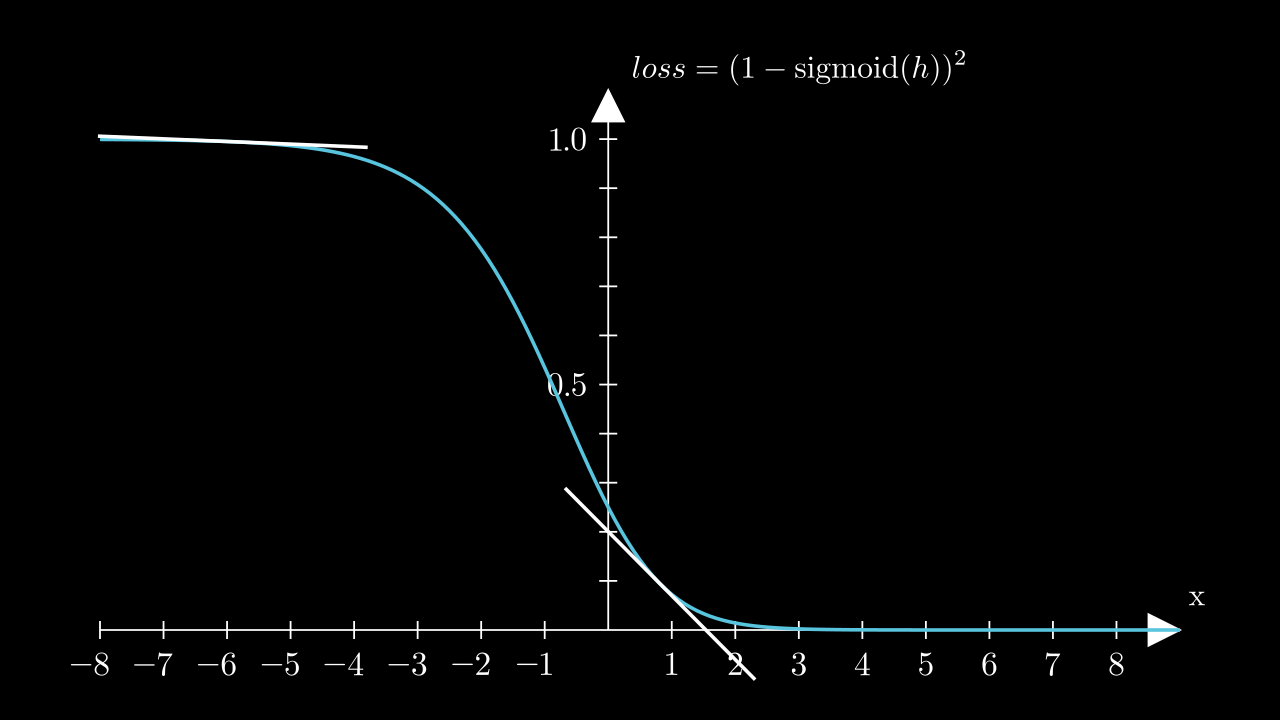

### Log Loss (Binary Cross Entropy) Function
For logistic regression we will use log loss function which is a convex function. It is defined as:

$$ L = \frac{1}{n}\sum_{i=1}^{i=n}- y_i\log{\hat{y}_i} - (1-y_i)\log{(1 - \hat{y}_i)}$$


Here, $y$ is a groud truth value and $\hat{y}= \text{sigmoid}(\mathbf{xw})$ is predicted value.

This loss function is also known as Binary Cross-Entropy

Since our groud truth label $y$ can only be either 0 or 1 we can divide the loss function into two parts:

## Case 1: $y = 0$

$$ L = -\log{(1 - \hat{y})}$$


## Case 1: $y = 1$

$$ L = -\log{\hat{y}}$$

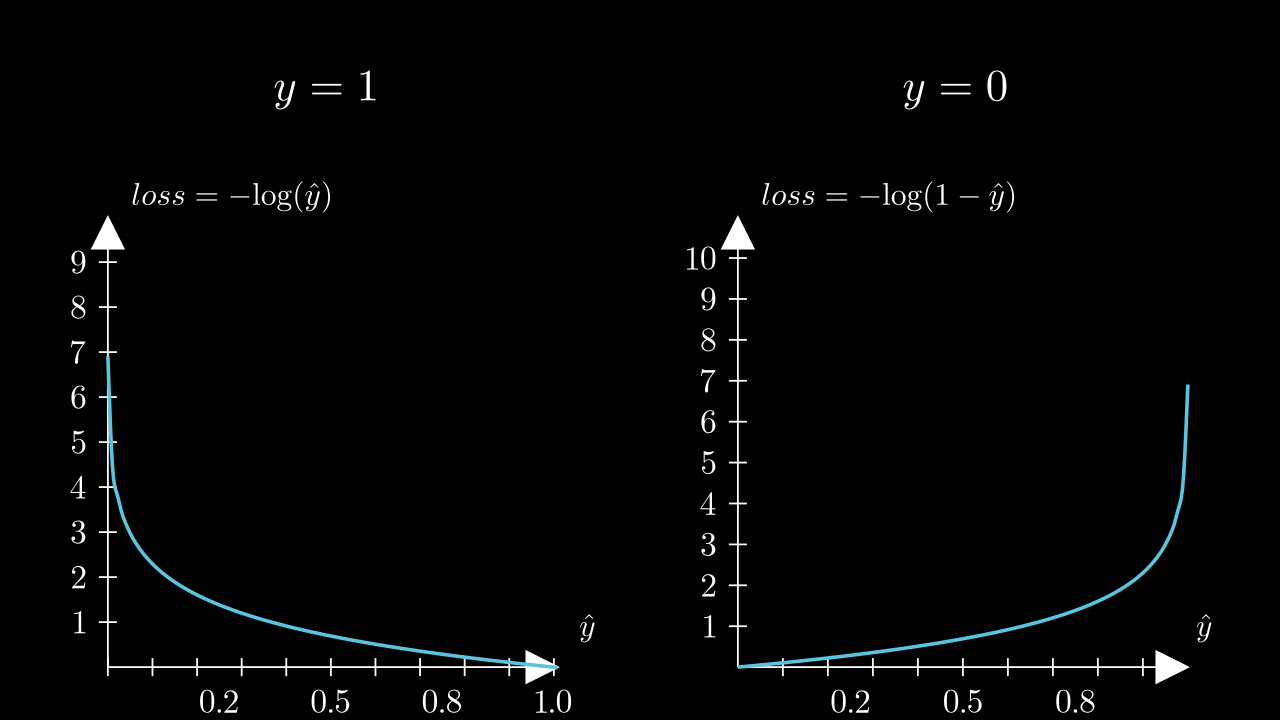

### Gradient of Log Loss
Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost). Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

\begin{align}
h &= \mathbf{XW} \\ 
\sigma(h) &= \frac{1}{1+e^{-h}}\\
\frac{\partial{w}}{\partial{L}} &= ?
\end{align}

In [2]:
class LogisticRegression:

  def __init__(self, eps=1e-6):
    self.x = None
    self.y = None
    self.w = None
    self.eps = eps
  
  def clip(self, x):
    return np.clip(x, a_min=self.eps, a_max=100)
  
  def add_ones(self, x):
    num_samples = x.shape[0]
    return np.concatenate([np.ones((num_samples, 1)), x], axis=-1)
  
  def activation(self, x):
    '''Impliment sigmoid function.
    
      Args:
        x: np.ndarray of shape (num_samples, num_features)
      
      Returns:
        numpy array of same shape
    '''
    return 1 / (1 + np.exp(-x))
  
  def compute_loss(self, x, y):
    '''Implement logistic loss function.
    you can access the w parameter using self.w in this function
    
    Args:
      x: numpy array of shape (num_samples, num_features),
      y: numpy array of shape (num_samples,)
    
    Returns:
      loss: float, logistic loss
    '''
    h = np.matmul(x, self.w)
    y_h = self.activation(h)

    loss = np.mean(-y*np.log(y_h) - (1-y)*np.log(1-y_h))
    return loss
    ###############################################
    #                 YOUR CODE                   #
    ###############################################
  
  def compute_gradient(self, x, y):
    """Compute gradient of log loss.
    
    Args:
      x: array of shape (num_samples, num_features)
      y: array of shape (num_samples,)
    
    Returns:
      grad: grandient of w with respect to loss. array of shape (num_features,)
    """
    x_t = np.transpose(x)
    h = np.matmul(x, self.w)
    h = self.activation(h)
    g = np.matmul(x_t, (h - y))
    return g
    ###############################################
    #                 YOUR CODE                   #
    ###############################################


  def update_weights(self, gradient, lr=1e-3):
    '''
    Update the weights using the gradient.
    
    Args:
      gradient: array of shape (num_features,)
    
    Returns:
      None
    '''
    self.w = self.w - lr * gradient
    ###############################################
    #                 YOUR CODE                   #
    ###############################################
  
  def predict(self, x):
    '''
    Predict the class label of unknown samples.

    Args:
      x: array of shape (num_test_samples, num_features)
    
    Returns:
      y_pred: array of shape (num_test_samples,)
    '''
    x = self.add_ones(x)
    return self.activation(np.matmul(x, self.w))
    ###############################################
    #                 YOUR CODE                   #
    ###############################################

  
  def fit(self, x, y, num_iters=100, lr=1e-03):
    '''
    Train the model using the input data.

    Args:
      x: array of shape (num_samples, num_features)
      y: array of shape (num_samples,)
      num_iters: int, number of gradient decent interation
      lr: float, learning rate

    Returns:
      loss_history: array of shape (num_iters,), i^th entry stores loss at i^th
      iteration.
    '''

    assert len(x.shape) == 2
    assert len(y.shape) == 1

    self.num_samples = x.shape[0]
    self.num_features = x.shape[1]

    self.w = np.random.normal(size=(self.num_features + 1,))

    x = self.add_ones(x)

    loss_history = self._fit(x, y, num_iter=num_iters, lr=lr)
    
    return loss_history

  
  def _fit(self, x, y, num_iter=100, lr=1e-3):
    
    loss_history = []
    
    for i in range(num_iter):
      
      #########################
      # 1. Compute loss       #
      # 2. Compute Grandients #
      # 3. Update Weights     #
      #########################
      loss = self.compute_loss(x, y)
      grad = self.compute_gradient(x, y)
      self.update_weights(grad)
      # Update loss history
      loss_history.append(loss)
    
    return loss_history
  
  def plot_boundry(self, x, transform=None):
    
    plt.figure(figsize=(8, 8))
    x_min, x_max = x_train[:,0].min(), x_train[:,0].max(),
    y_min, y_max = x_train[:,1].min(), x_train[:,1].max(),
    xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

    grid_x = np.stack([xx.ravel(), yy.ravel()], axis=-1)
    if transform:
      grid_x = transform(grid_x)

    grid_pred = self.predict(grid_x)
    grid_pred = grid_pred.reshape(xx.shape)
    y_pred = self.predict(x)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred>0.5)
    plt.contourf(xx, yy, grid_pred, 50, cmap='RdGy', linewidths=0, alpha=0.2)
    plt.colorbar()

# Create Dummy Dataset

In [3]:
x, y = sklearn.datasets.make_blobs([1000, 1000], cluster_std=[1.7, 1.7], centers=[[-3, -3], [3, 3]])

# Create training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x/3, y)

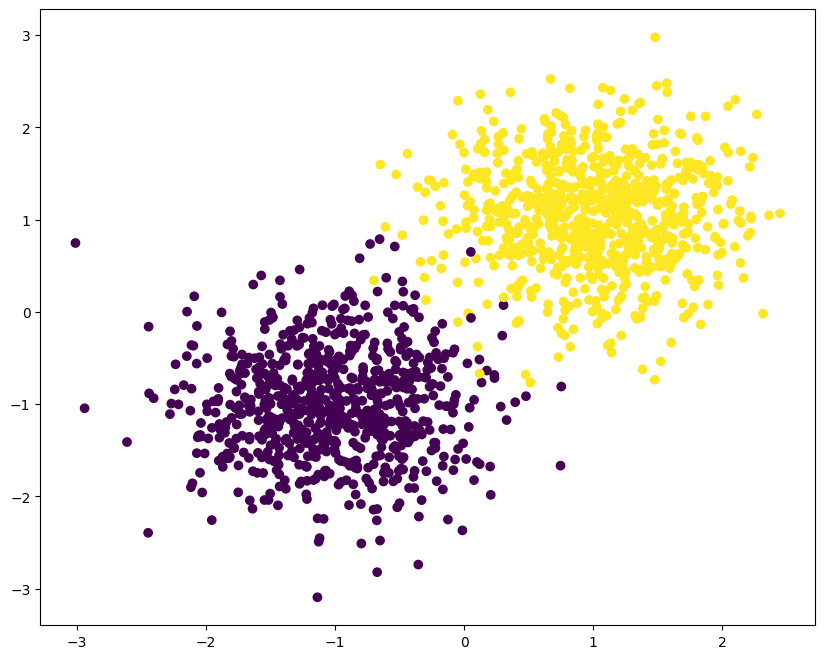

In [4]:
# Plot training data
plt.figure(figsize=(10, 8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [5]:
# Create and train the model
model = LogisticRegression()
loss_history = model.fit(x_train, y_train, lr=1e-01)

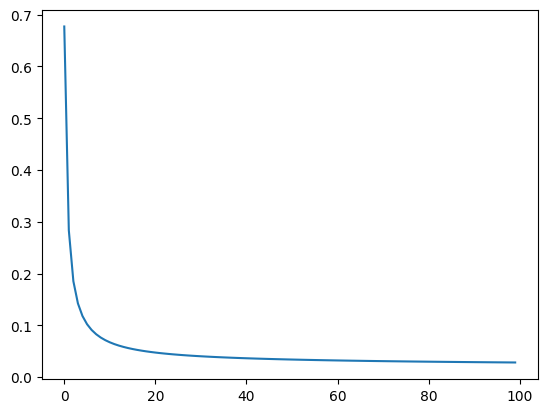

In [6]:
plt.plot(loss_history)

<ipython-input-2-b536861ba4f7>:163: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, grid_pred, 50, cmap='RdGy', linewidths=0, alpha=0.2)


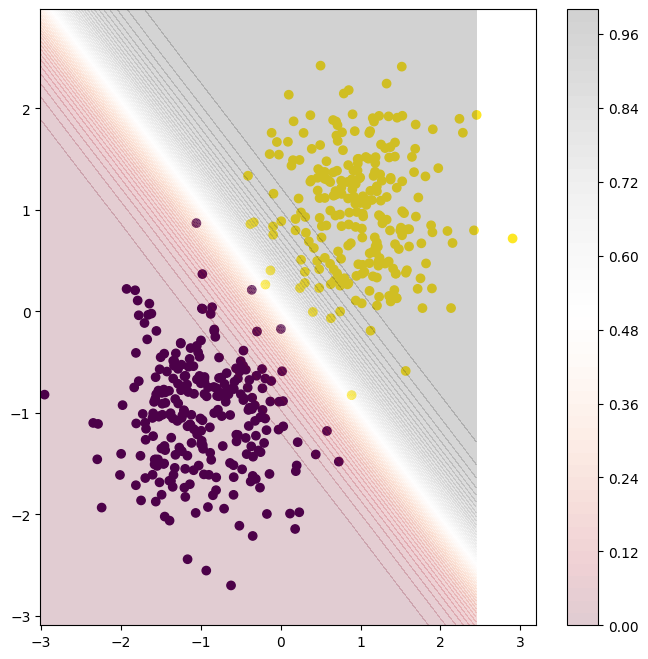

In [7]:
model.plot_boundry(x_test)

# Non-Linear Decision Boundary

In [8]:
x, y = sklearn.datasets.make_moons([1000, 1000], noise=0.12)

x_train, x_test, y_train, y_test = train_test_split(x, y)

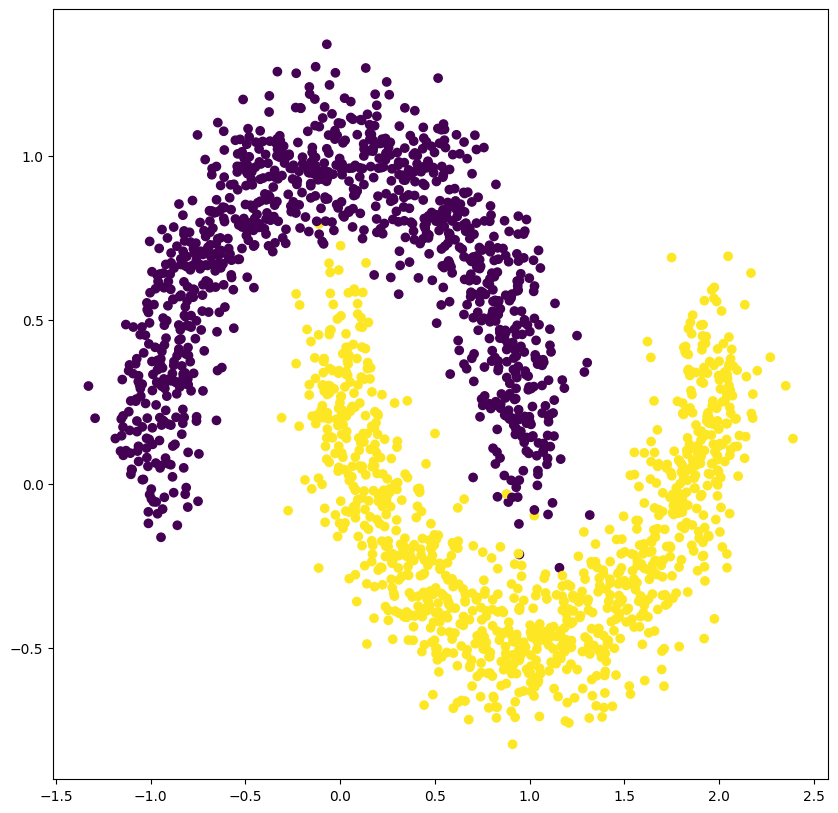

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=y)

In [10]:
# Create and train the model
model = LogisticRegression()
loss_history = model.fit(x_train, y_train, lr=1e-01)

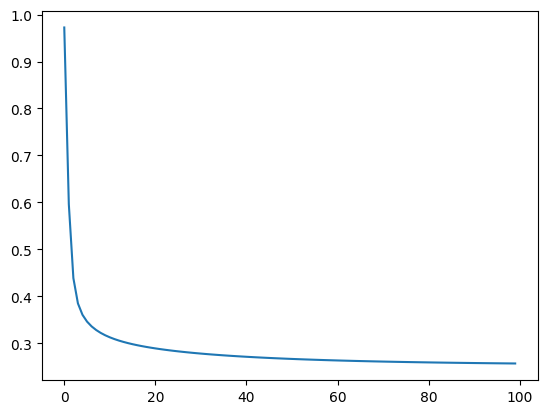

In [11]:
plt.plot(loss_history)

<ipython-input-2-b536861ba4f7>:163: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, grid_pred, 50, cmap='RdGy', linewidths=0, alpha=0.2)


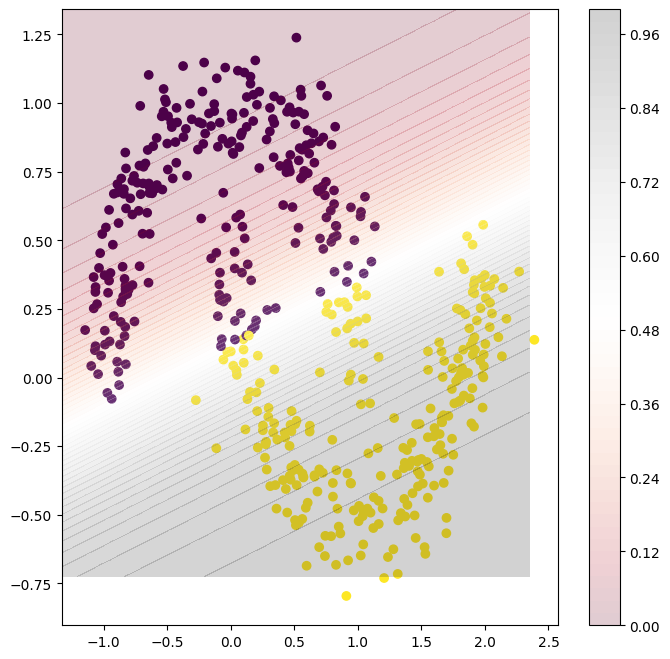

In [12]:
model.plot_boundry(x_test)

In [13]:

# Create New Feature called center from the distance: Try it your self
d = np.sum(x**2, axis=1)

# Add it to our data matrix: Try it your self

x_3d = np.concatenate([x, np.expand_dims(d, axis=1)], axis=1)

In [14]:
d.shape, x.shape

((2000,), (2000, 2))

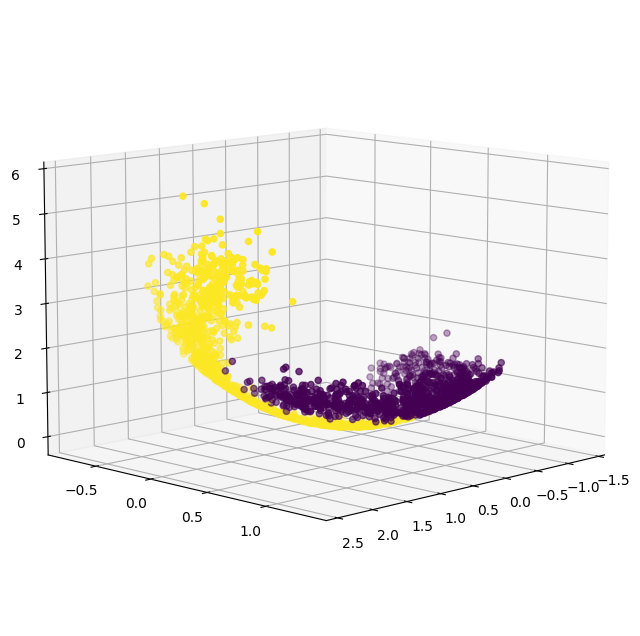

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10, azim=45)
ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], c=y)

In [16]:
def append_distance(x):
  '''computes distance from the center for each point in the x and append it as a new feature.
  
  Args:
    x: array of shape (num_samples, num_features)
  
  Returns:
    updated_x: array of shape (num_samples, num_features + 1)
  
  '''
  d = np.sum(x**2, axis=1)
  x_3d = np.concatenate([x, np.expand_dims(d, axis=1)], axis=1)

  return x_3d
  ###############################################
  #                 YOUR CODE                   #
  ###############################################

In [17]:
x_train_3d = append_distance(x_train)
x_test_3d = append_distance(x_test)

In [18]:
x_train_3d.shape

(1500, 3)

In [19]:
model = LogisticRegression()
loss_history = model.fit(x_train_3d, y_train, lr=1e-03)

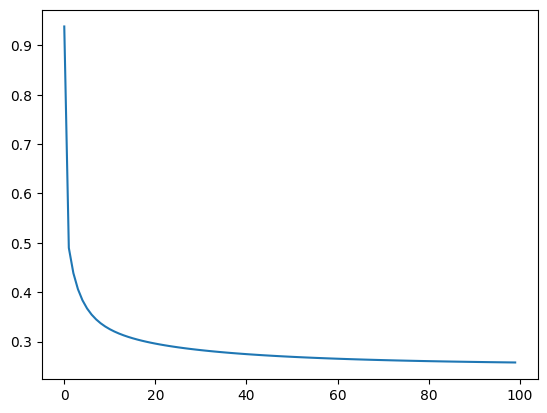

In [20]:
plt.plot(loss_history)

<ipython-input-2-b536861ba4f7>:163: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, grid_pred, 50, cmap='RdGy', linewidths=0, alpha=0.2)


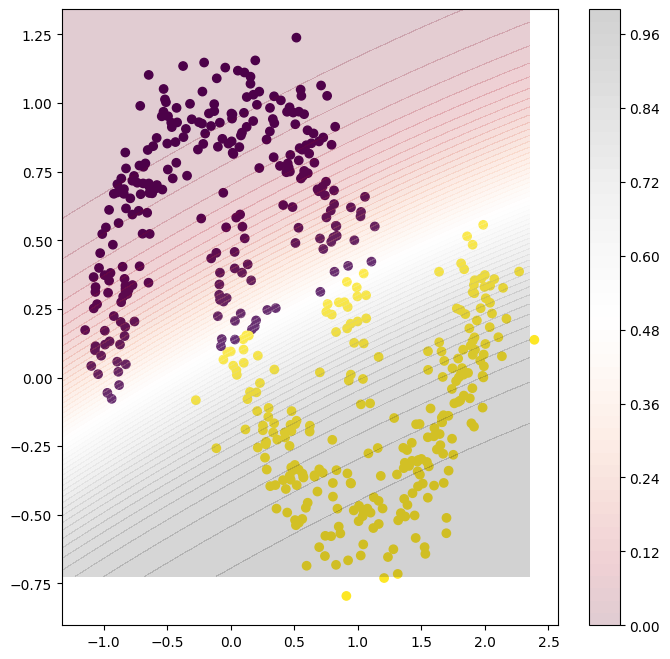

In [21]:
model.plot_boundry(x_test_3d, transform=append_distance)

# Polynomial Features

In [22]:
model = LogisticRegression()

In [23]:
poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

x_train_poly.shape, x_test_poly.shape

((1500, 28), (500, 28))

In [24]:
x_train_poly

array([[ 1.00000000e+00,  1.17110035e+00, -4.70104680e-01, ...,
         6.69832966e-02, -2.68885252e-02,  1.07936280e-02],
       [ 1.00000000e+00,  1.09432439e+00,  1.47408206e-01, ...,
         5.65429941e-04,  7.61648136e-05,  1.02595890e-05],
       [ 1.00000000e+00,  1.10632008e+00,  4.71722533e-01, ...,
         6.06049470e-02,  2.58412729e-02,  1.10184304e-02],
       ...,
       [ 1.00000000e+00,  1.60475024e+00,  9.39604842e-02, ...,
         2.00722421e-04,  1.17525926e-05,  6.88131562e-07],
       [ 1.00000000e+00, -3.73953357e-01,  8.69202522e-01, ...,
         7.98212978e-02, -1.85533495e-01,  4.31246781e-01],
       [ 1.00000000e+00,  3.24729552e-01, -2.83655201e-01, ...,
         6.82663414e-04, -5.96314768e-04,  5.20888180e-04]])

In [25]:
np.mean(x_train_poly, axis=-1)

array([0.30801766, 0.37828882, 0.55228236, ..., 1.65399988, 0.12717889,
       0.04119293])

In [26]:
# Create a model and fit it using the polynomial data
# Try it your self
model.fit(x_train_poly, y_train, lr=1e-09, num_iters=100)

<ipython-input-2-b536861ba4f7>:41: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*np.log(y_h) - (1-y)*np.log(1-y_h))
<ipython-input-2-b536861ba4f7>:41: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*np.log(y_h) - (1-y)*np.log(1-y_h))


[4.453589151170866,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

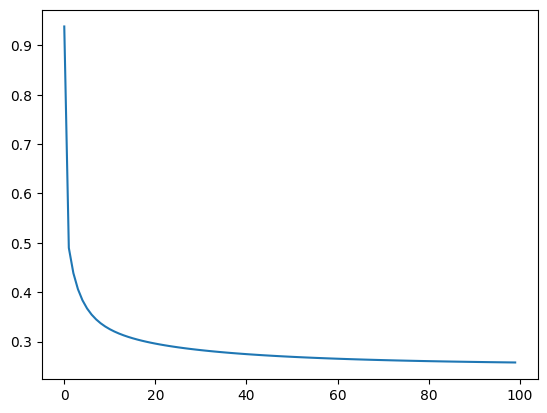

In [27]:
plt.plot(loss_history)

<ipython-input-2-b536861ba4f7>:163: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, grid_pred, 50, cmap='RdGy', linewidths=0, alpha=0.2)


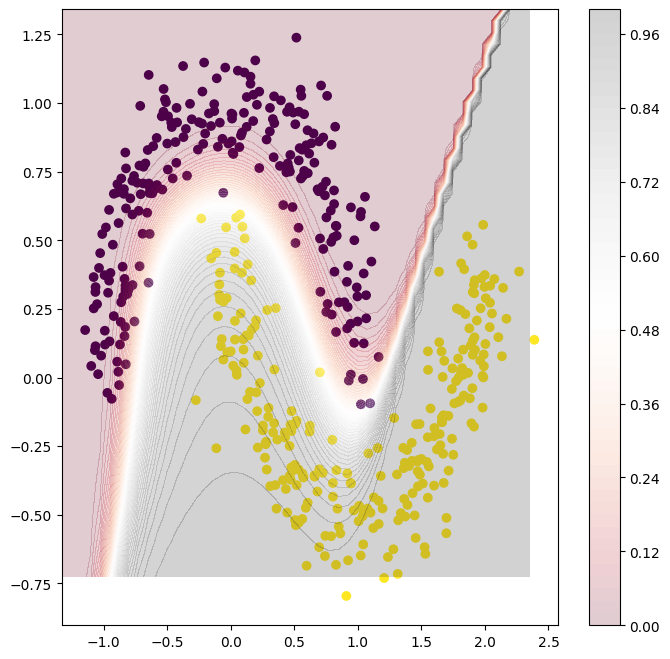

In [28]:
model.plot_boundry(x_test_poly, transform=poly_features.transform)